In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import os

df = pd.read_csv('profile_data.csv')

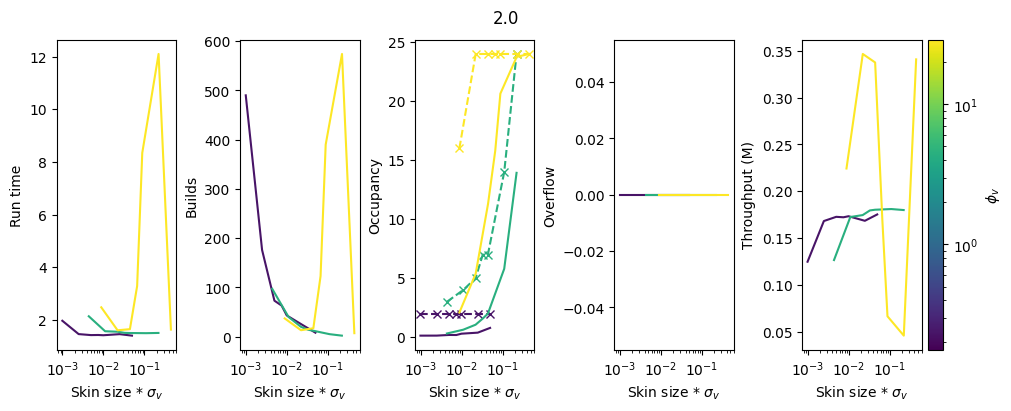

In [ ]:
mu_norm = LogNorm(df.mu.min(), df.mu.max())
phi_norm = LogNorm(df.true_packing_fraction.min(), df.true_packing_fraction.max())
ratio = df.vertex_diam_large / df.vertex_diam_small
sigma_norm = LogNorm(ratio.min(), ratio.max())
cmap = plt.cm.viridis

for alpha in df.alpha.unique():
    fig, ax = plt.subplots(1, 5, figsize=(10, 4), constrained_layout=True, sharex=True)

    for mu in df.mu.unique():
        mask = (df.alpha == alpha) & (df.mu == mu)
        _df = df[mask]

        # c = cmap(mu_norm(mu))
        c = cmap(phi_norm(_df.true_packing_fraction.values[0]))
        # c = cmap(sigma_norm((_df.vertex_diam_large / _df.vertex_diam_small).values[0]))
        x = _df.skins * (2 * _df.vertex_rad)
        # x = _df.skins * (_df.vertex_diam_large)
        # x = _df.skins * (_df.vertex_diam_small)

        ax[0].plot(x, _df.run_time, c=c)
        ax[1].plot(x, _df.builds, c=c)
        ax[2].plot(x, _df.occupancy, c=c)
        ax[2].plot(x, _df.max_occupancy, ls='--', marker='x', c=c)
        ax[3].plot(x, _df.overflow, c=c)
        ax[4].plot(x, _df.throughput / 1e6, c=c)
    for a in ax:
        a.set_xlabel(r'Skin size $* \ \sigma_v$')
        a.set_xscale('log')
    ax[0].set_ylabel('Run time')
    ax[1].set_ylabel('Builds')
    ax[2].set_ylabel('Occupancy')
    ax[3].set_ylabel('Overflow')
    ax[4].set_ylabel('Throughput (M)')

    plt.suptitle(alpha)

    sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
    sm.set_array(df.true_packing_fraction)
    cbar = plt.colorbar(sm, ax=ax[-1], label=r'$\phi_v$')
    plt.show()
